<a href="https://colab.research.google.com/github/JessicaLLenz/DSCIrepo/blob/main/ny_homesLab1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import seaborn as sns
import plotnine as p9
import polars as pl
import polars.selectors as cs
import matplotlib.pyplot as plt

# Load data

In [4]:
(nyhome := pl.read_csv("/Saratoga_NY_Homes.csv"))

Price,Lot.Size,Waterfront,Age,Land.Value,New.Construct,Central.Air,Fuel.Type,Heat.Type,Sewer.Type,Living.Area,Pct.College,Bedrooms,Fireplaces,Bathrooms,Rooms,Fireplaces?
i64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,i64,i64
132500,0.09,0,42,50000,0,0,3,4,2,906,35,2,1,1.0,5,1
181115,0.92,0,0,22300,0,0,2,3,2,1953,51,3,0,2.5,6,0
109000,0.19,0,133,7300,0,0,2,3,3,1944,51,4,1,1.0,8,1
155000,0.41,0,13,18700,0,0,2,2,2,1944,51,3,1,1.5,5,1
86060,0.11,0,0,15000,1,1,2,2,3,840,51,2,0,1.0,3,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
289000,0.38,0,32,24200,0,0,2,3,3,2310,61,5,1,2.5,11,1
285000,0.94,0,37,36200,0,0,2,3,3,2564,61,4,1,2.5,11,1
194900,0.39,0,9,20400,0,0,2,2,3,1099,51,2,0,1.0,3,0


## Box plot

In [5]:
(nypredict :=
    nyhome
    .select(cs.by_name('Price') | cs.exclude('Lot.Size', 'age', 'Land.Value', 'Price'))
    .unpivot(on=cs.exclude('Lot.Size', 'age', 'Land.Value', 'Price'),
             index='Price',
             variable_name='predictor',
             value_name='value')
    .to_pandas()
)


,Price,predictor,value
0,132500,Waterfront,0.0
1,181115,Waterfront,0.0
2,109000,Waterfront,0.0
3,155000,Waterfront,0.0
4,86060,Waterfront,0.0
...,...,...,...
24187,289000,Fireplaces?,1.0
24188,285000,Fireplaces?,1.0
24189,194900,Fireplaces?,0.0
24190,125000,Fireplaces?,1.0


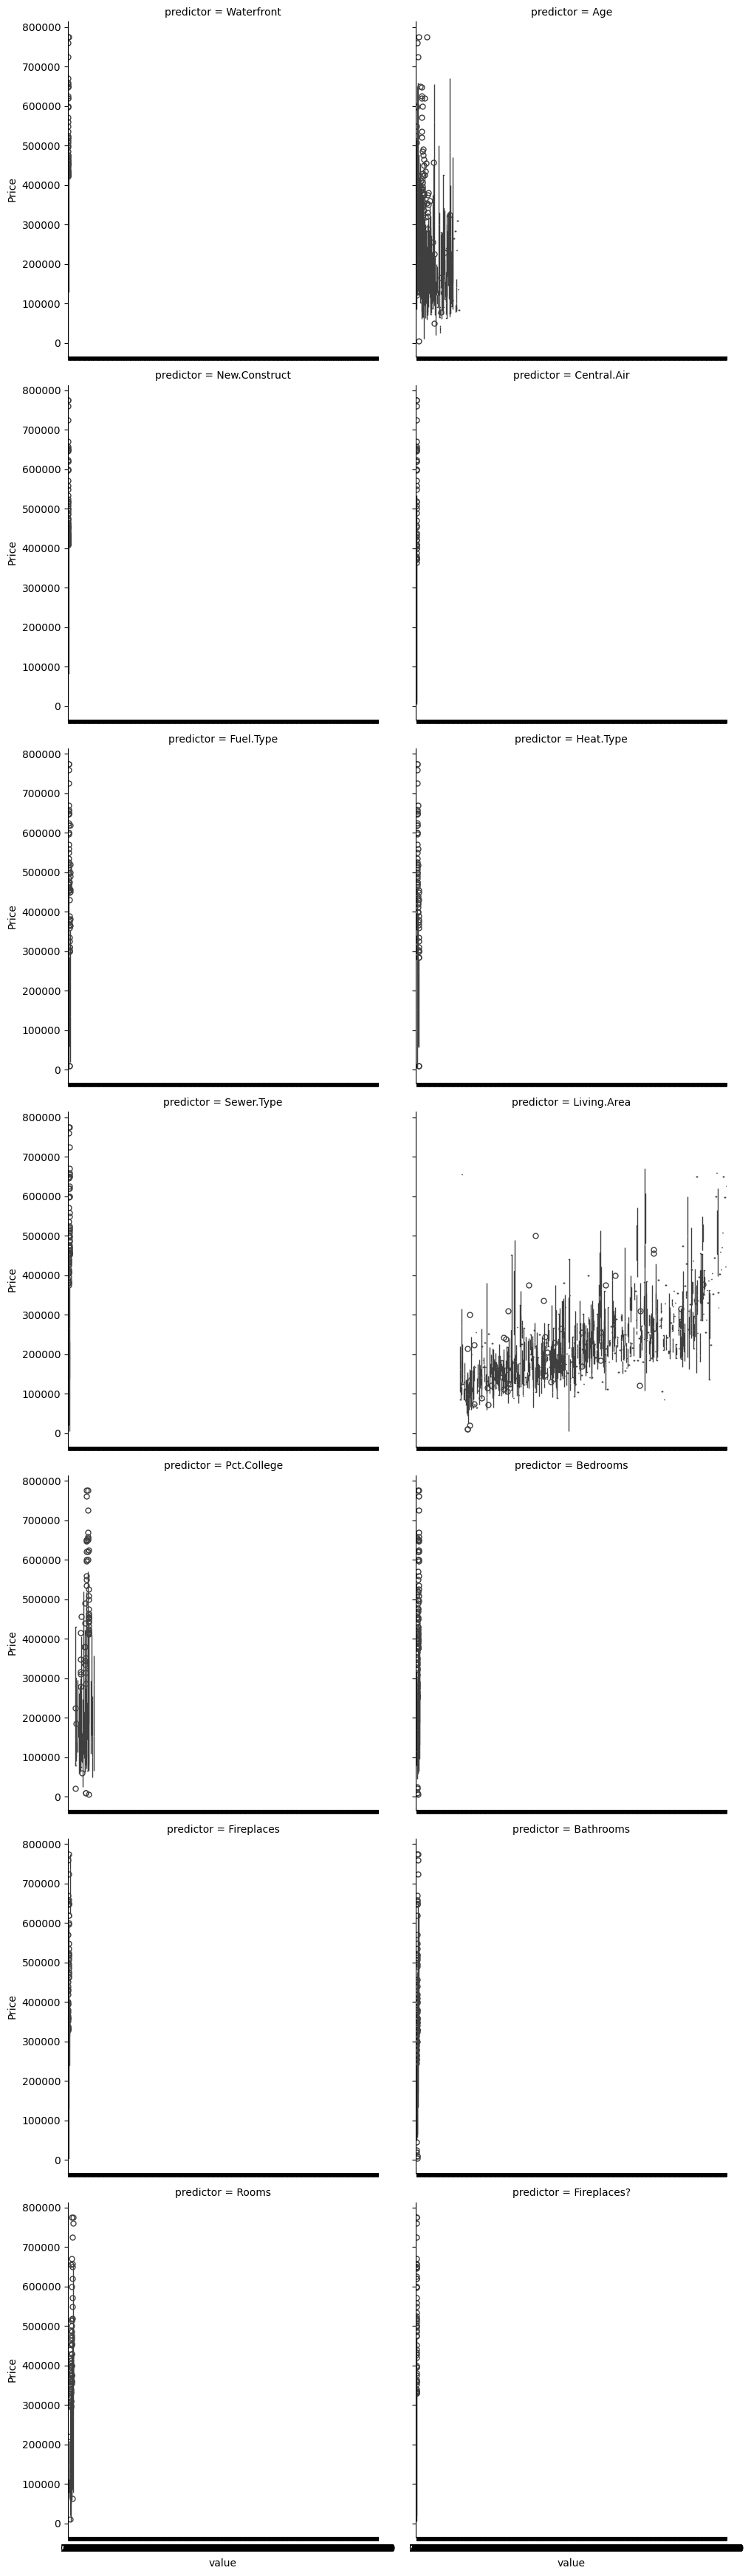

In [6]:
sns.catplot(data=nypredict, x='value', y='Price', col='predictor', kind='box', col_wrap=2)
plt.show()

### Summary:
#### The box plots illustrate the distribution of home prices across different categories or values of various predictors. For instance, homes with certain features like 'Waterfront' or a higher number of 'Bathrooms' or 'Rooms' tend to show a higher median price and often a broader spread of prices. Conversely, homes lacking these features generally exhibit lower median prices. The plots effectively highlight how each predictor's discrete values or categories influence the overall distribution and central tendency of home prices.

## Pair plot

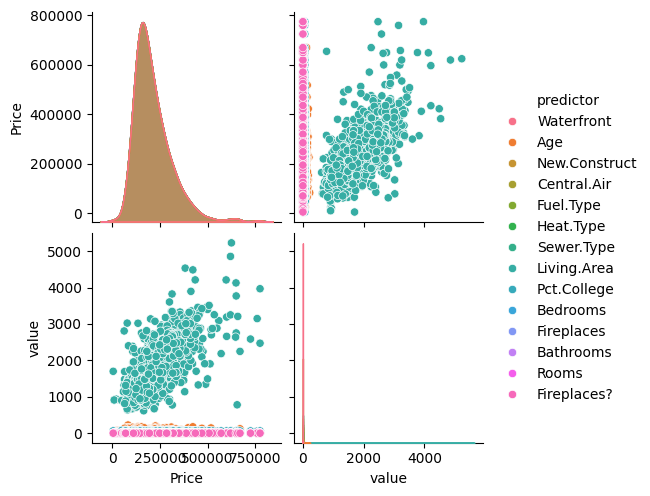

In [7]:
sns.pairplot(nypredict, hue='predictor')
plt.show()

### Summary:
#### It displays the individual distributions of Price and value for each predictor, as well as their pairwise scatter plots. This allows us to observe how home prices vary with different features. For instance, we can identify if certain predictors show a positive correlation with price (e.g., more 'Rooms' leading to higher 'Price') or if there are distinct price clusters based on categorical predictors like 'Waterfront' (e.g., homes with a waterfront feature having a different price distribution compared to those without).

## Group by predictor

In [8]:
print(nypredict['predictor'].unique())

['Waterfront' 'Age' 'New.Construct' 'Central.Air' 'Fuel.Type' 'Heat.Type'
 'Sewer.Type' 'Living.Area' 'Pct.College' 'Bedrooms' 'Fireplaces'
 'Bathrooms' 'Rooms' 'Fireplaces?']


select a few predictors for smaller data set and faster loading

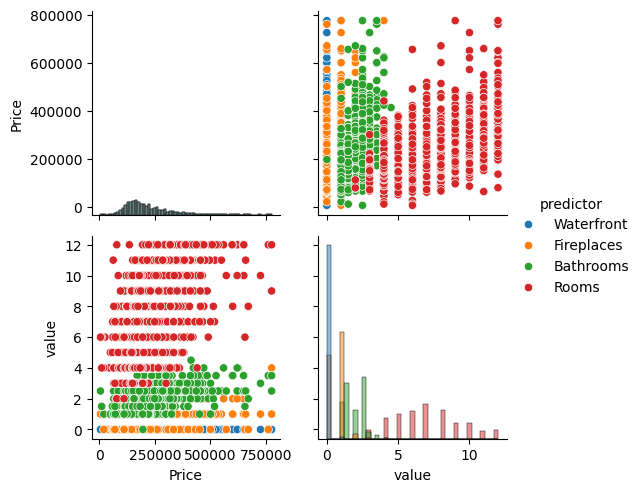

In [9]:
selected_predictors = ['Waterfront', 'Fireplaces', 'Bathrooms', 'Rooms']
nypredict_subset = nypredict[nypredict['predictor'].isin(selected_predictors)]

ny_subset = sns.PairGrid(nypredict_subset, hue='predictor')
ny_subset.map_diag(sns.histplot)
ny_subset.map_offdiag(sns.scatterplot)
ny_subset.add_legend()
plt.show()

### Summary:
#### The histograms on the diagonal show the distribution of values for each predictor (e.g., the number of homes with a certain count of bathrooms). The off-diagonal scatter plots illustrate how Price changes with the value of each predictor, and how these predictors relate to one another. For example, you can observe if Bathrooms and Rooms tend to increase together, and how each of these, along with Waterfront and Fireplaces, correlates with higher or lower home prices. The hue by predictor further helps to visually differentiate the influence of each feature within the plots.

